# The Power of Parallel Processing feat. multithreading and multiprocessing

If you've worked with data, chances are you've had to deal with large datasets. and I mean LARGE!

![Large Dataset](../img/large-dataset.jpeg)

[Source](https://medium.com/@laxmi.vanam17/large-data-sets-in-machine-learning-4ce3a7916e92)

When working with large datasets, one consequence is slower processing. To demonstrate, we are going to try to fetch some metadata about all the connections we have access to based on all the whitelabels we have access to without parallel processing.
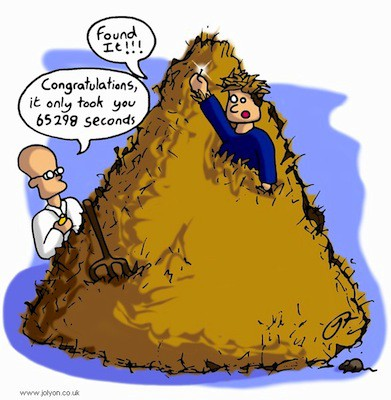

First we'll get our API token by running `%env API_TOKEN` in one cell, then copy it and run `API_TOKEN = <pasted-token>` in another cell to set it as a variable. I've hidden it so you can't see it!

Next, we'll see the list of whitelabels we have access to. For each whitelabel, we will then retrieve a list of connections and put it altogether to give us a master list.

In [36]:
import locussdk as locus

whitelabels = locus.get_whitelabel()
whitelabels

[{'whitelabelid': 1, 'company': 'Atom'},
 {'whitelabelid': 2, 'company': 'AdLoop'},
 {'whitelabelid': 3, 'company': 'Advantex'},
 {'whitelabelid': 4, 'company': 'WL TEST'},
 {'whitelabelid': 5, 'company': 'Hydropool'},
 {'whitelabelid': 6, 'company': 'Gourmet'},
 {'whitelabelid': 7, 'company': 'CHR'},
 {'whitelabelid': 8, 'company': 'FreeMedia'},
 {'whitelabelid': 9, 'company': 'Metroland'},
 {'whitelabelid': 10, 'company': 'Ocono'},
 {'whitelabelid': 11, 'company': 'JonesMedia'},
 {'whitelabelid': 12, 'company': 'AviStudio'},
 {'whitelabelid': 13, 'company': 'STAMedia'},
 {'whitelabelid': 14, 'company': 'TwerkMedia'},
 {'whitelabelid': 15, 'company': 'Vector'},
 {'whitelabelid': 16, 'company': 'Propel'},
 {'whitelabelid': 17, 'company': 'AdUs'},
 {'whitelabelid': 18, 'company': 'TheCollective'},
 {'whitelabelid': 19, 'company': 'ScratchMarketing'},
 {'whitelabelid': 20, 'company': 'ROCMedia'},
 {'whitelabelid': 21, 'company': 'Glam'},
 {'whitelabelid': 22, 'company': 'McEathronMedia'}

In [37]:
%%time
import requests

headers = {'eq-api-jwt': API_TOKEN}
route = 'https://api.locus.place/prod'

connections = []
for wl in whitelabels:
    params = {'whitelabel': wl['whitelabelid']}
    r = requests.get(f"{route}/connections", params=params, headers=headers)
    connections.extend(r.json())

CPU times: user 2.36 s, sys: 129 ms, total: 2.49 s
Wall time: 23.7 s


If you don't believe that it's there, run the next line!

In [38]:
print(len(connections))
connections

973


[{'id': 1576,
  'set_id': 122,
  'set_name': 'COVID Ontario',
  'columns': {'Row_ID': {'hash': False,
    'type': 'Number',
    'description': '',
    'primary_key': True},
   'Outcome1': {'hash': False,
    'type': 'string',
    'description': '',
    'primary_key': False},
   'Age_Group': {'hash': False,
    'type': 'string',
    'description': '',
    'primary_key': False},
   'Client_Gender': {'hash': False,
    'type': 'string',
    'description': '',
    'primary_key': False},
   'Case_Reported_Date': {'hash': False,
    'type': 'Timestamp (UTC)',
    'description': '',
    'primary_key': False},
   'Case_AcquisitionInfo': {'hash': False,
    'type': 'string',
    'description': '',
    'primary_key': False},
   'Reporting_PHU_Latitude': {'hash': False,
    'type': 'float',
    'description': '',
    'primary_key': False},
   'Reporting_PHU_Longitude': {'hash': False,
    'type': 'float',
    'description': '',
    'primary_key': False},
   'Reporting_PHU_Postal_Code': {'hash': F

To avoid spending lots of time waiting around, one way is to optimize the runtime of your code by using parallel processing. Parallel Processing is nothing new to us. Here's an example: Imagine you're an EQ data analyst and you find out there are 3 reports waiting to be done for a specific client. You can either do all 3 reports yourself one by one, or get 2 other data analysts to help you out perhaps by taking one part in each report or doing one report each. Parallel processing is the second option.

![single vs parallel.png](../img/single-vs-parallel.png)

Python offers this capability of parallel processing in 2 ways, through 2 modules: multiprocessing and threading! You'll see this example again later in multithreading.

# What is multiprocessing?

Python was designed this in mind: computers would only have one core. One process to be run by the one core at a time. Process is an executable program (so running some code) with its own memory space. But nowadays, that's not the case- computers have multiple cores. Since Python was not designed to have multiple processes run at the same time so there was potential of memory getting mixed up between the processes. It's like suddenly being able to read someone else's thoughts all of a sudden which can get chaotic. So Python has a Global Interpreter Lock (GIL) in place to help manage memory management and run one process with one core at a time. But this means Python doesn't effectively use all of the cores that are at its disposal. That's where multiprocessing comes in: create multiple processes with its own memory space for each core.
![Multiprocessing](../img/multiprocessing.png)
[Source](https://levelup.gitconnected.com/multi-threading-and-multiprocessing-in-python-3d5662f4a528)

Multiprocessing bypasses GIL and uses all cores (one process per core). You'll see the speed difference in a bit through an example with pandas and Modin. An analogy of this would be 3 data analysts working on 1 report as opposed to 1 data analyst working on 3 reports.
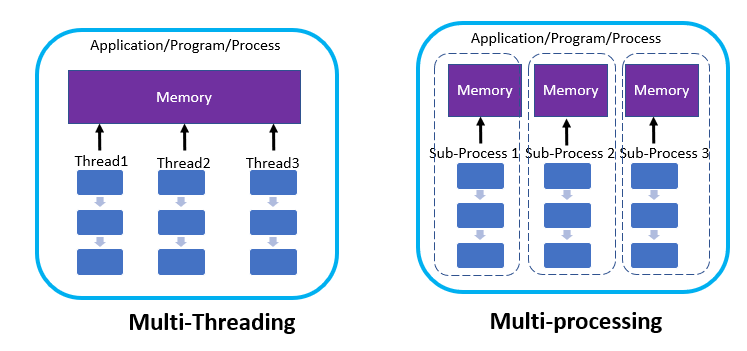

# When would you use multiprocessing?

This method is great for CPU-intensive processes like deep analyses, heavy filtering and data manipulation. By having multiple processes, you lighten the load instead of one process doing all of the work, like in the data analyst scenario.

# Modin: An example of multiprocessing
....

# You mentioned threading, what is multithreading?

If the tasks aren't CPU-intensive such as data fetching and other I/O operations like web scraping, we can leverage threading. Threads are components of a process that work in parallel and share the same memory space. As mentioned earlier, a process is executable code with its own memory space. When data fetching, one process is enough (instead of multiple processes) since the processor will be waiting around for data to come back so we can fetch data in parallel by using threads. Python will execute one thread at a time utilizing the one process.

An example is: think about multiple people editing a google document in real-time. The google document is one memory space and multiple people are adding text to this document. Think of each person as a thread. In our data analyst example, it's like 3 analysts working on one report to speed up the process. In multiprocessing, it'd be like multiple google documents being edited by 1 person each or in our data analyst example, 1 data analyst doing 1 report each.

### Multithreading
![Multithreading](../img/multithreading-analogy.png)

### Multiprocessing
![Multiprocessing](../img/multiprocessing-analogy.png)
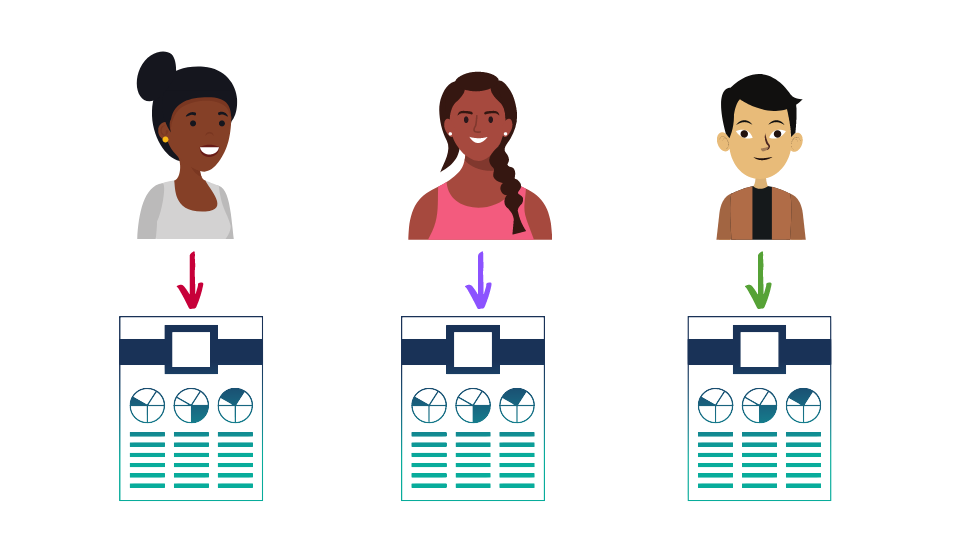
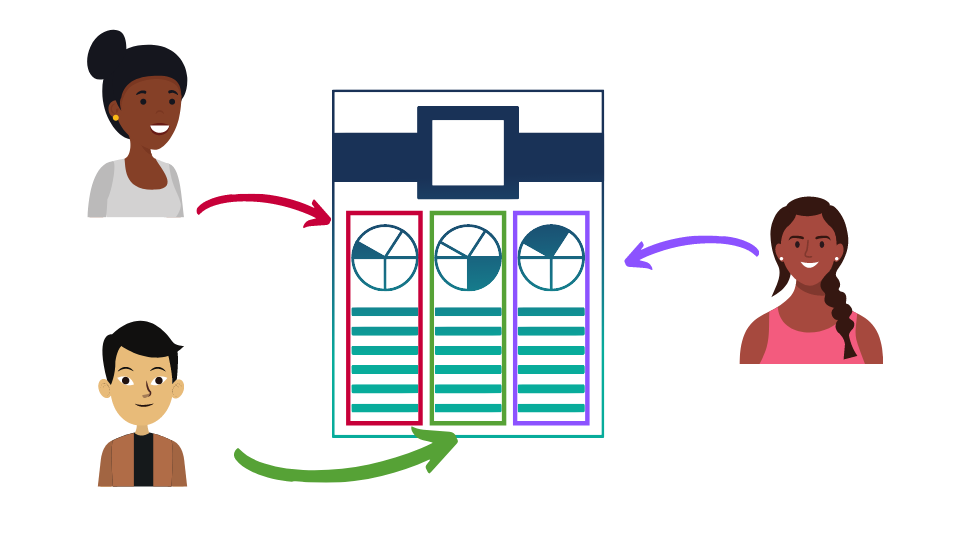

# So when would we use threading?

1. Creating processes can be a bit slow so if the code that you are running is not CPU-intensive such as data fetching, threading is a great option. Creating threads is much more lightweight than creating processes. 
2. Sharing objects is easier between threads since they share the same memory space so if you're fetching from many different areas and combining the data, threading is good.
![Multithreading diagram](../img/threading-diagram.jpeg)
[Source](https://timber.io/blog/multiprocessing-vs-multithreading-in-python-what-you-need-to-know/)
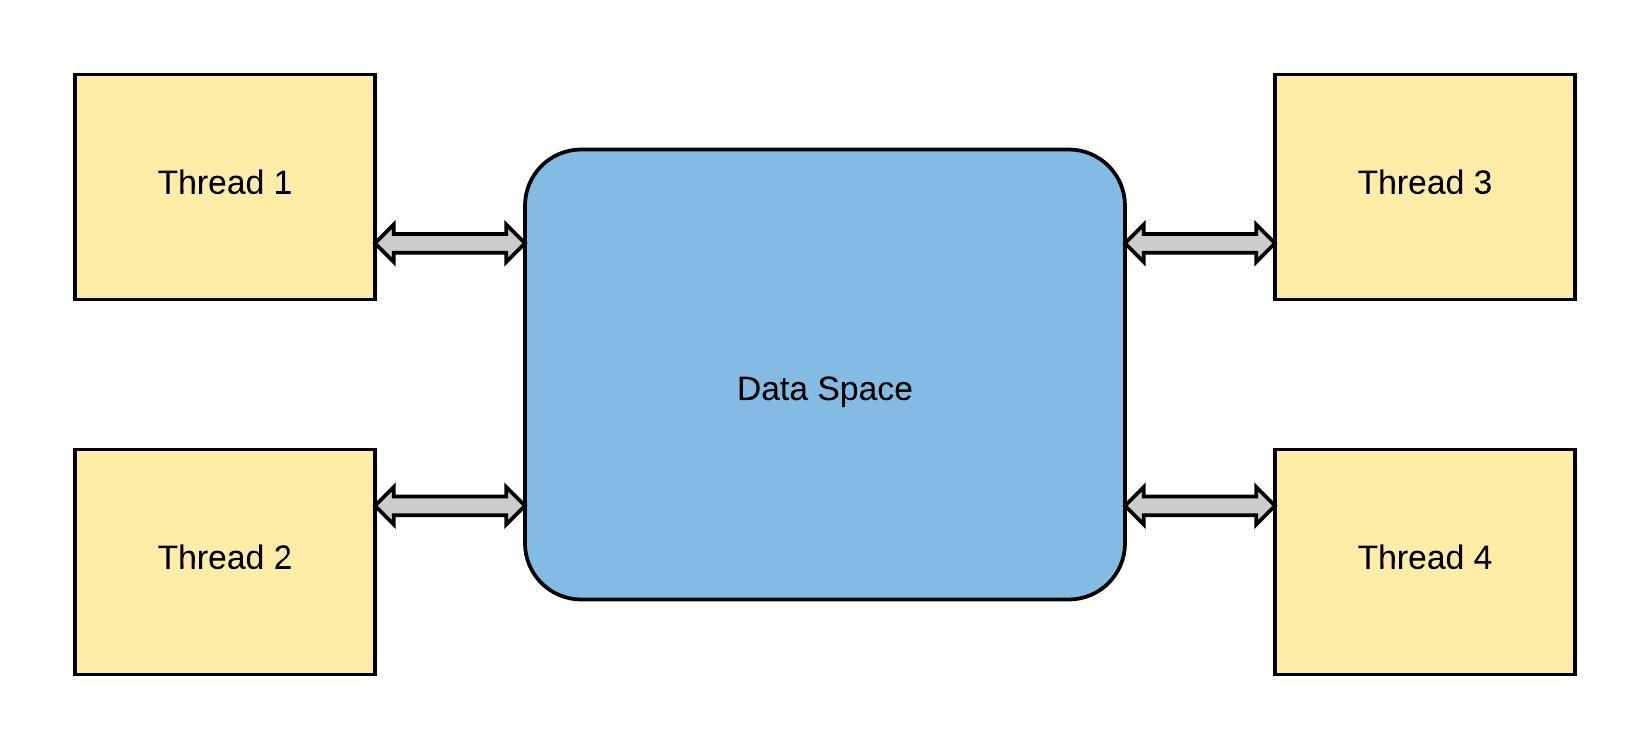

# When should we not use threading?

1. There is overhead associated with managing threads
2. Increases the complexity of the program, which can make debugging more difficult

# An example of multithreading using ThreadPoolExecutor

We use multithreading quite a bit in locussdk as well as the backend providing the data into locussdk for LOCUS Notebook. 

`ThreadPoolExecutor` from the in-built library, `concurrent.futures` is one way to use multithreading. What it does is it creates threads and groups them altogether in one pool of memory. Based on the number of threads, each thread simultaneously takes on a task. Once it's done, if there is information sent back, the information is stored in `as_completed`. One example is getting a list of all external datasets a.k.a the connections made in Connection Hub in locussdk.

Let's first create a helper function for fetching connections for a single whitelabel.

In [39]:
def get_connections_per_whitelabel(wl):
    params = {'whitelabel': wl['whitelabelid']}
    r = requests.get(f"{route}/connections", params=params, headers=headers)
    return r.json()

CPU times: user 2.36 s, sys: 127 ms, total: 2.49 s
Wall time: 5.85 s


Now we'll use ThreadPoolExecutor to do the same thing that we did in the beginning with the for loop, except there's a few things to note:
- we need to create a variable for collecting all of the tasks a.k.a the queue called `conn_tasks`'
- we need to specify how many threads can be created based on the workload provided (the queue)
- `executor.submit` will execute our helper function which is provided as the first argument. The rest of the arguments are for our helper function (which requires one). So if our helper function required 2 arguments, `executor.submit` would have 3 arguments, not 2.
- as_completed will contain all of the results from each thread that's done their task from the queue (which we provide as an argument)

In [ ]:
%%time

from concurrent.futures import ThreadPoolExecutor, as_completed

import requests

headers = {'eq-api-jwt': API_TOKEN}
route = 'https://api.locus.place/prod'
threads = 8
connections_pp = []
conn_tasks = []

with ThreadPoolExecutor(max_workers=threads) as executor:
    for wl in whitelabels:
        conn_tasks.append(executor.submit(get_connections_per_whitelabel, wl))
    
    for future in as_completed(conn_tasks):
        connections_pp.extend(future.result())

Wow, that was fast! If you don't believe it's the same result from the beginning, run the next cell.

In [40]:
print(len(connections_pp))
connections

973


[{'id': 1576,
  'set_id': 122,
  'set_name': 'COVID Ontario',
  'columns': {'Row_ID': {'hash': False,
    'type': 'Number',
    'description': '',
    'primary_key': True},
   'Outcome1': {'hash': False,
    'type': 'string',
    'description': '',
    'primary_key': False},
   'Age_Group': {'hash': False,
    'type': 'string',
    'description': '',
    'primary_key': False},
   'Client_Gender': {'hash': False,
    'type': 'string',
    'description': '',
    'primary_key': False},
   'Case_Reported_Date': {'hash': False,
    'type': 'Timestamp (UTC)',
    'description': '',
    'primary_key': False},
   'Case_AcquisitionInfo': {'hash': False,
    'type': 'string',
    'description': '',
    'primary_key': False},
   'Reporting_PHU_Latitude': {'hash': False,
    'type': 'float',
    'description': '',
    'primary_key': False},
   'Reporting_PHU_Longitude': {'hash': False,
    'type': 'float',
    'description': '',
    'primary_key': False},
   'Reporting_PHU_Postal_Code': {'hash': F

### Summary

Parallel processing through multiprocessing and multithreading is powerful when dealing with large datasets whether it's coming from APIs or internally as it can significantly speed up the processing of them. Multiprocessing is useful when running complex logic whereas multithreading shines when data fetching from an API. It may not always be necessary but when the going gets tough, the tough get going!

# Sources

- [https://blog.floydhub.com/multiprocessing-vs-threading-in-python-what-every-data-scientist-needs-to-know/](https://blog.floydhub.com/multiprocessing-vs-threading-in-python-what-every-data-scientist-needs-to-know/)
- [https://timber.io/blog/multiprocessing-vs-multithreading-in-python-what-you-need-to-know/](https://timber.io/blog/multiprocessing-vs-multithreading-in-python-what-you-need-to-know/)
- [https://www.educative.io/edpresso/what-is-multithreading-in-python](https://www.educative.io/edpresso/what-is-multithreading-in-python)